# Stock Market Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AAPL_data.csv') 

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-06-13,24.780001,24.275000,24.672501,24.334999,152082000.0,22.733387,AAPL
1,2016-06-14,24.620001,24.187500,24.330000,24.365000,127727600.0,22.761415,AAPL
2,2016-06-15,24.602501,24.257500,24.455000,24.285000,117780800.0,22.686680,AAPL
3,2016-06-16,24.437500,24.017500,24.112499,24.387501,125307200.0,22.782436,AAPL
4,2016-06-17,24.162500,23.825001,24.155001,23.832500,244032800.0,22.263964,AAPL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Open       1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   float64
 6   Adj Close  1258 non-null   float64
 7   Name       1258 non-null   object 
dtypes: float64(6), object(2)
memory usage: 78.8+ KB


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,61.447436,60.133203,60.788158,60.815085,1.270491e+08,59.641747
std,32.877387,31.920018,32.449177,32.399088,5.748357e+07,32.866308
min,23.262501,22.875000,23.225000,23.010000,4.544800e+07,21.495594
25%,39.184999,38.516251,38.948124,38.873751,8.862690e+07,37.262375
50%,48.017500,47.406250,47.782499,47.751249,1.111002e+08,46.306246
75%,75.206249,72.734375,74.014997,74.381874,1.463086e+08,73.640976
max,145.089996,141.369995,143.600006,143.160004,4.479400e+08,142.704010


In [6]:
df.shape

(1258, 8)

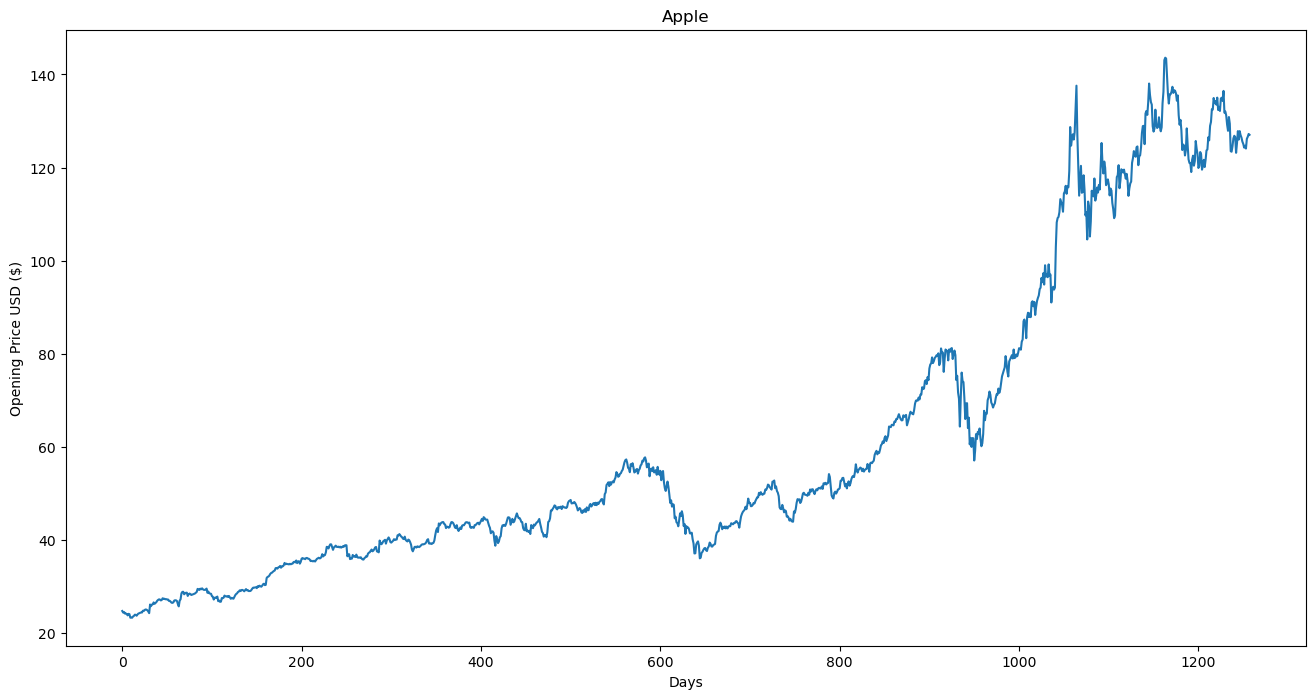

In [8]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

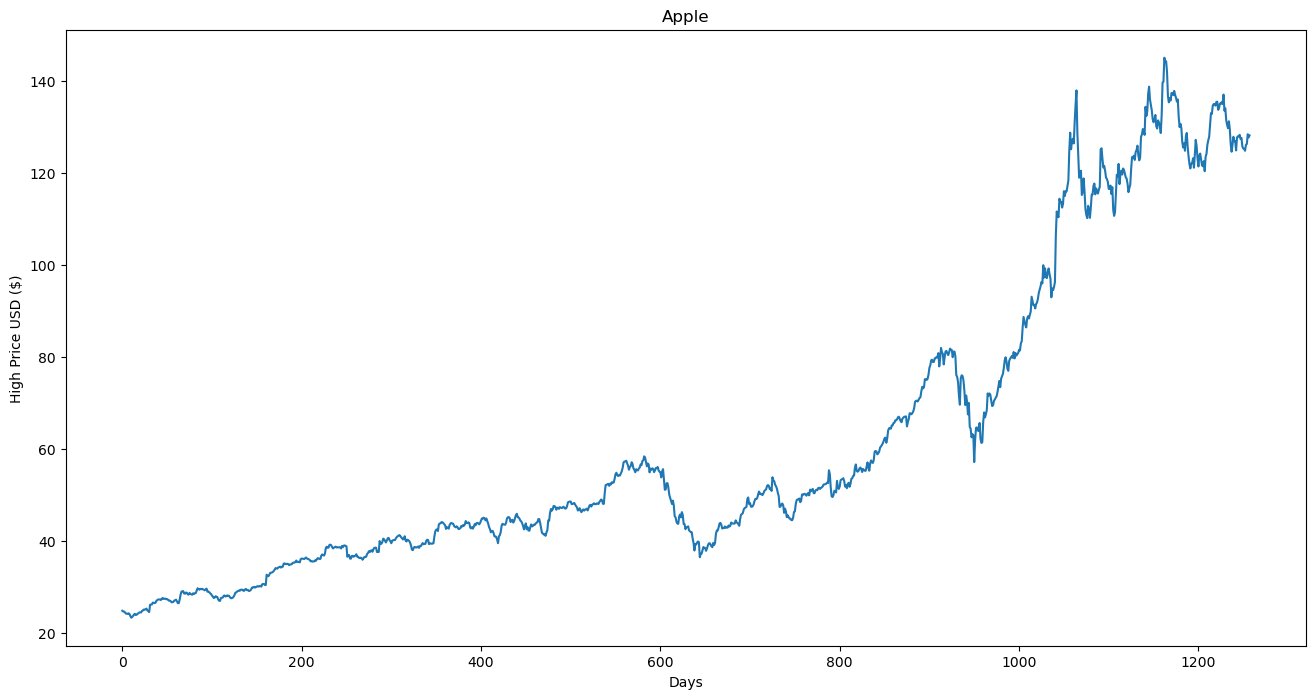

In [9]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

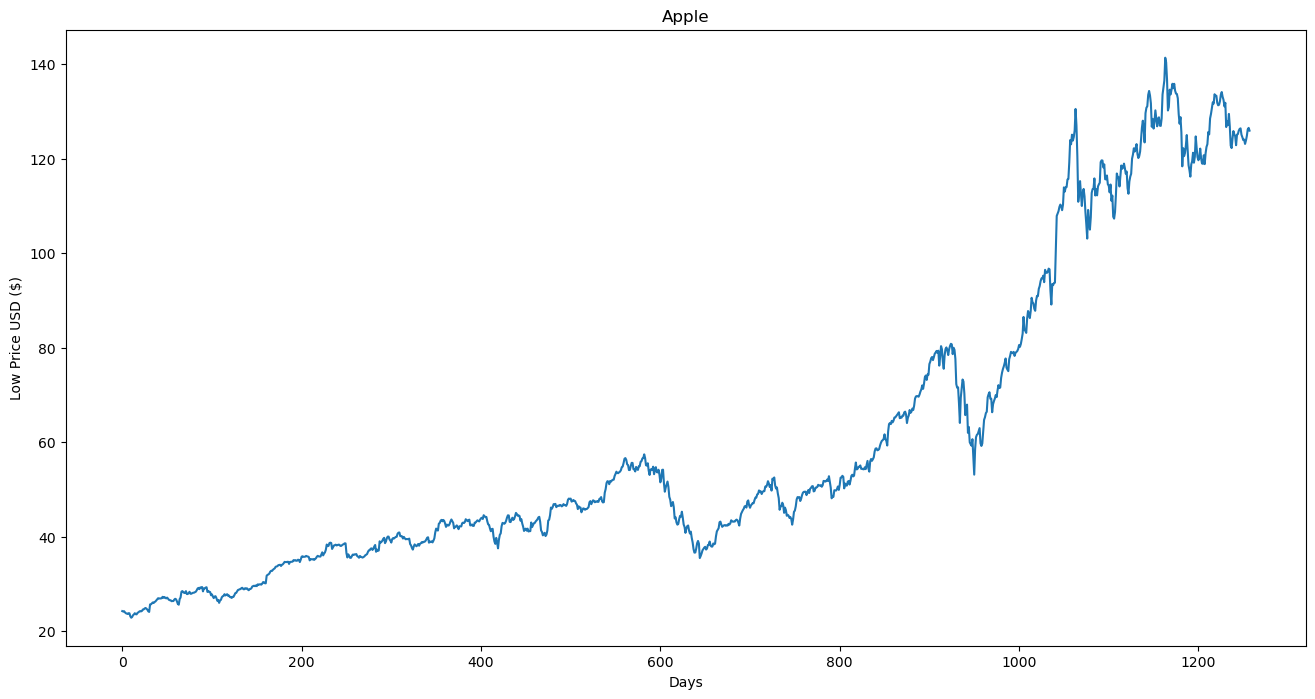

In [10]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

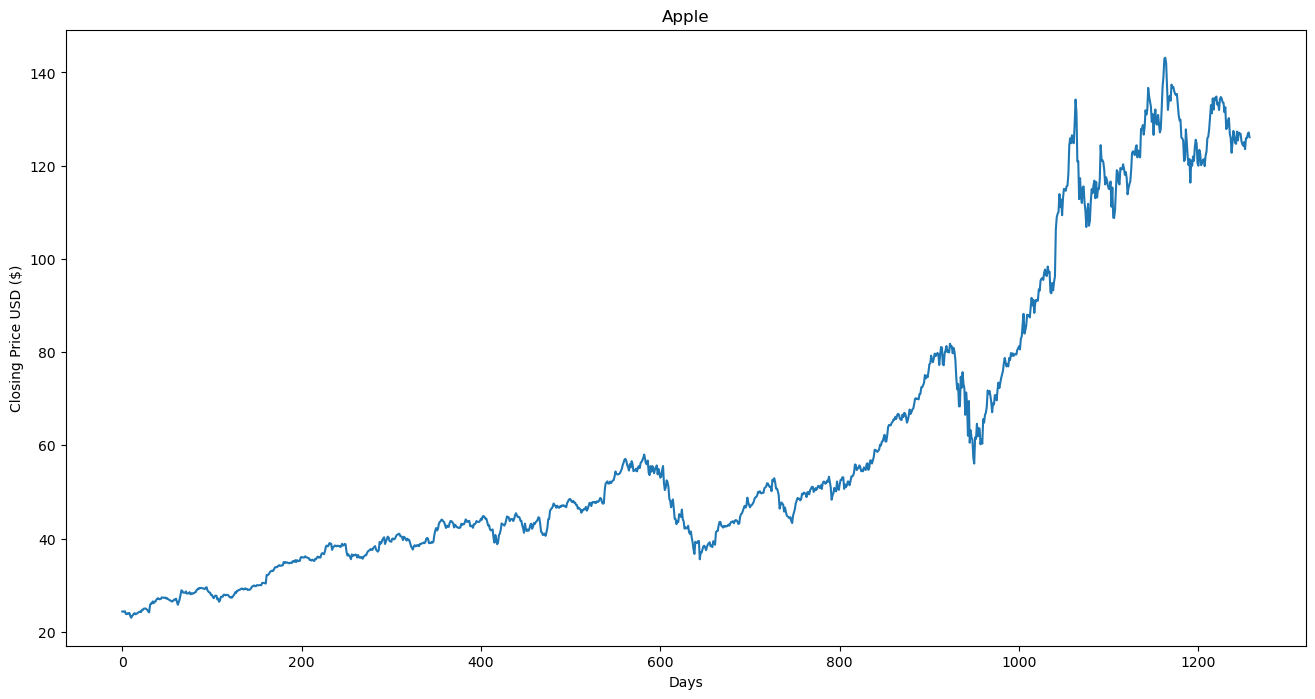

In [11]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [12]:
df2 = df['Close']

df2.tail()

1253    125.889999
1254    125.900002
1255    126.739998
1256    127.129997
1257    126.110001
Name: Close, dtype: float64

In [13]:
df2 = pd.DataFrame(df2)

In [14]:
df2.tail()

,Close
1253,125.889999
1254,125.900002
1255,126.739998
1256,127.129997
1257,126.110001


In [16]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [17]:
df2.tail()

,Close,Prediction
1253,125.889999,NaN
1254,125.900002,NaN
1255,126.739998,NaN
1256,127.129997,NaN
1257,126.110001,NaN


In [18]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 24.33499908]
 [ 24.36499977]
 [ 24.28499985]
 ...
 [130.88999939]
 [128.91000366]
 [127.13999939]]


C:\Users\Rahul Singh\AppData\Local\Temp\ipykernel_23880\1853731690.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [19]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 27.89749908  27.45750046  27.20999908 ... 126.73999786 127.12999725
 126.11000061]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [24]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [25]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Rahul Singh\AppData\Local\Temp\ipykernel_23880\1876488320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[124.82499695],
       [126.52249908],
       [125.01000214],
       [124.80750275],
       [129.03999329],
       [134.17999268],
       [131.3999939 ],
       [120.87999725],
       [120.95999908],
       [112.81999969],
       [117.31999969],
       [113.48999786],
       [112.        ],
       [115.36000061],
       [115.54000092],
       [112.12999725],
       [110.33999634],
       [106.83999634],
       [110.08000183],
       [111.80999756],
       [107.12000275],
       [108.22000122],
       [112.27999878],
       [114.95999908],
       [114.08999634],
       [115.80999756],
       [116.79000092],
       [113.01999664],
       [116.5       ],
       [113.16000366],
       [115.08000183],
       [114.97000122],
       [116.97000122],
       [124.40000153],
       [121.09999847],
       [121.19000244],
       [120.70999908],
       [119.01999664],
       [115.98000336],
       [117.51000214],
       [116.87000275],
       [115.75      ],
       [115.04000092],
       [115

In [26]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[127.83000183 132.02999878 136.86999512 139.07000732 142.91999817
 143.16000366 142.05999756 131.96000671 131.96000671 134.13999939
 134.99000549 133.94000244 137.38999939 136.75999451 136.91000366
 137.38999939 119.90000153 135.13000488 135.36999512 133.19000244
 130.83999634 129.71000671 129.86999512 126.         125.86000061
 125.34999847 120.98999786 121.26000214 127.79000092 125.12000275
 122.05999756 120.12999725 121.41999817 116.36000061 121.08999634
 119.98000336 121.95999908 121.02999878 123.98999786 125.56999969
 124.76000214 128.80000305 119.98999786 119.98999786 134.32000732
 120.08999634 120.58999634 130.96000671 121.38999939 119.90000153
 126.         123.         125.90000153 126.20999908 127.90000153
 130.36000061 131.24000549 131.24000549 134.42999268 132.02999878
 134.5        134.16000366 134.83999634 133.11000061 133.5
 123.98999786 134.32000732 134.72000122 134.38999939 133.58000183
 133.47999573 131.46000671 132.53999329 127.84999847 126.84999847
 129.74000549 130

In [27]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[141.27653807 143.15898354 141.48169962 141.25713787 145.95075944
 151.6507632  148.56788277 136.90172955 136.9904476  127.963593
 132.95386926 128.70658766 127.05425411 130.78032773 130.97993912
 127.1984146  125.21339258 121.3320666  124.9250716  126.84355085
 121.64257979 122.86242341 127.36475883 130.33674592 129.37195613
 131.27935197 132.36612697 128.18537967 132.04453037 128.3406405
 130.469823   130.3478378  132.56573836 140.80523927 137.14569997
 137.24550989 136.71321003 134.83908135 131.46787995 133.16457252
 132.45484502 131.21281766 130.42546398 130.43655585 132.15542371
 126.1670905  130.7359687  123.57215091 123.47234098 125.32429438
 130.32565405 134.85017322 134.47313419 131.84491898 131.45678808
 135.36028934 135.04978461 135.10523551 136.25854482 135.249396
 133.74122294 134.41768329 132.97604454 129.10581044 130.56962447
 131.52332238 132.14433183 134.87235697 138.94220247 139.34142524
 139.18617288 138.42099448 140.0844199  140.78305553 137.89978649
 139.51885289 1

In [28]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\Rahul Singh\AppData\Local\Temp\ipykernel_23880\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


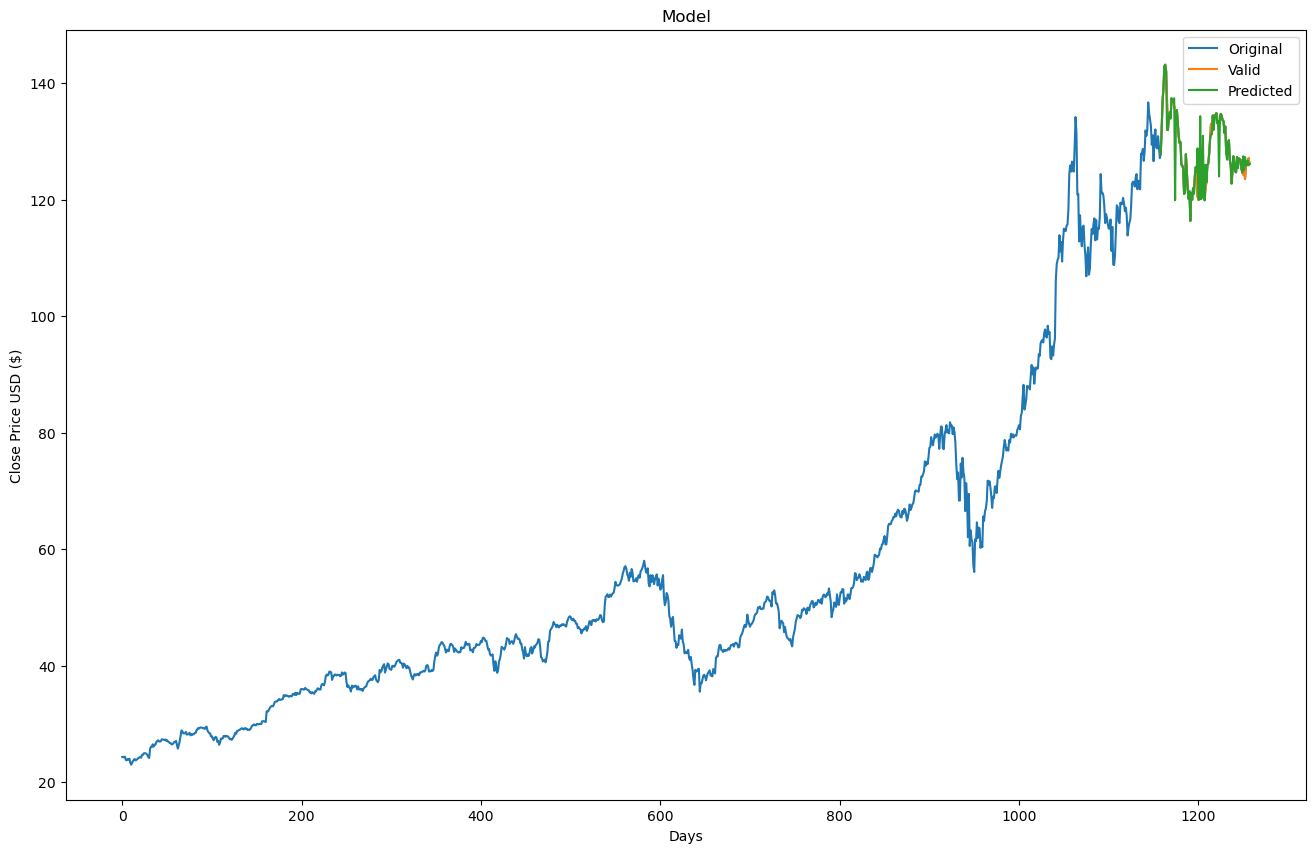

In [33]:
plt.figure(figsize=(16,10))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()